In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

from loadSKIRTOR_MRN77_force_reg import LoadSKIRTOR_MRN77

In [2]:
sk = LoadSKIRTOR_MRN77()

In [3]:
sk.lam_grid

<Quantity [1200., 1350., 1500., 1650., 1800., 1950., 2100., 2250., 2400.,
           2550., 2700., 3610., 5550.] Angstrom>

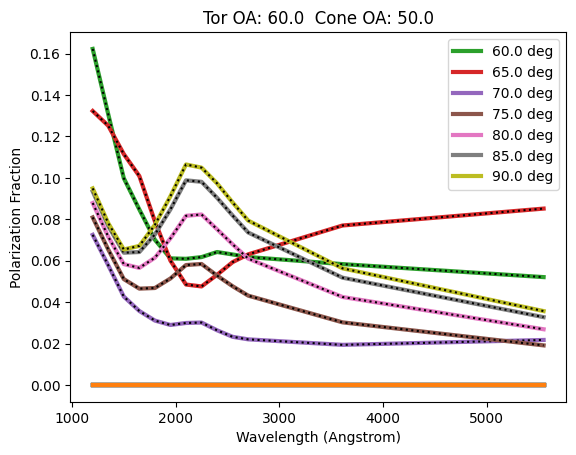

In [4]:
tang_val = 60.
cang_val = 50.
for iang in np.arange(0, 90+0.1, 5.):

    tang_use = tang_val*np.ones(len(sk.lam_grid))
    cang_use = cang_val*np.ones(len(sk.lam_grid))
    iang_use = iang*np.ones(len(sk.lam_grid))
    lam_use  = sk.lam_grid.value
    label = None
    if iang>=tang_val:
        label = "{} deg".format(iang)
    plt.plot(sk.lam_grid, sk.p((tang_use, cang_use, iang_use, lam_use)), ls='solid', lw=3.0, label=label)

    fname = "models/bHDPol_mrn77_tor_oa{:.1f}_con_oa{:.1f}-tauV0.1_i{:.1f}_sed.dat".format(tang_val, cang_val, iang)
    if os.path.exists(fname):
        data = np.loadtxt(fname)
        plt.plot(data[:,0]*1e4, (data[:,8]**2+data[:,9]**2)**0.5/data[:,1], color='black', ls='dotted')

# for k, iang in enumerate(sk.iang_grid):
#     plt.plot(sk.lam_grid, sk.p_grid[i,j,k])
plt.xlabel("Wavelength (Angstrom)")
plt.ylabel("Polarization Fraction")
plt.title("Tor OA: {}  Cone OA: {}".format(tang_val, cang_val))
plt.legend()
plt.show()